In [1]:
# Read our dataset using read_csv()
import pandas as pd
bbc_text = pd.read_csv('bbc-text.csv')
bbc_text=bbc_text.rename(columns = {'text': 'News_Headline'}, inplace = False)
bbc_text.head()


,category,News_Headline
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [2]:
import seaborn as sns

/tmp/ipython-input-1506146780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(bbc_text.category,palette="Set1")


<Axes: xlabel='count', ylabel='category'>

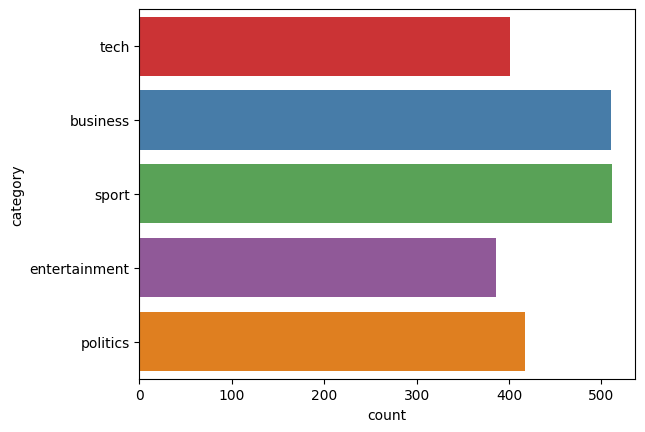

In [3]:
# Finding out the total number of plots and headlines:
sns.countplot(bbc_text.category,palette="Set1")


In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [11]:
from matplotlib import pyplot as plt

In [13]:
from collections import Counter

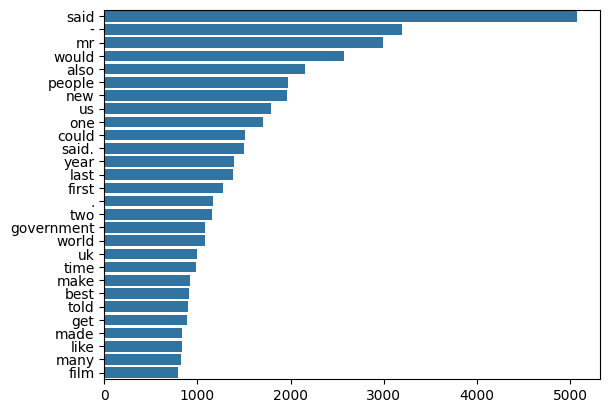

In [14]:
def top_frequent_words(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    counter=Counter(corpus)
    mostCommon=counter.most_common()
    x, y=[], []
    for word,count in mostCommon[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x)
top_frequent_words(bbc_text['News_Headline'])


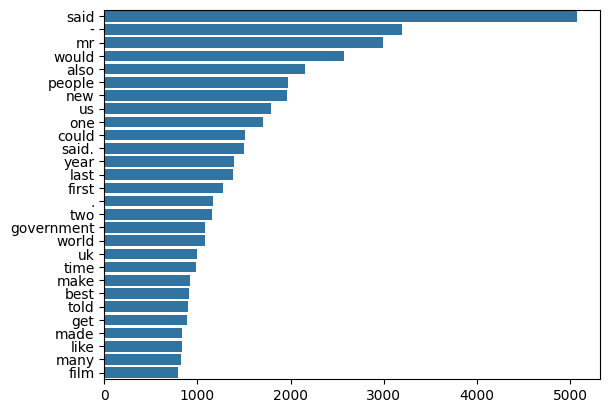

In [15]:
def top_frequent_words(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    counter=Counter(corpus)
    mostCommon=counter.most_common()
    x, y=[], []
    for word,count in mostCommon[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x)
top_frequent_words(bbc_text['News_Headline'])


In [16]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud

# Download WordNet corpus (run this once)
nltk.download('wordnet')
from wordcloud import STOPWORDS


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [18]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

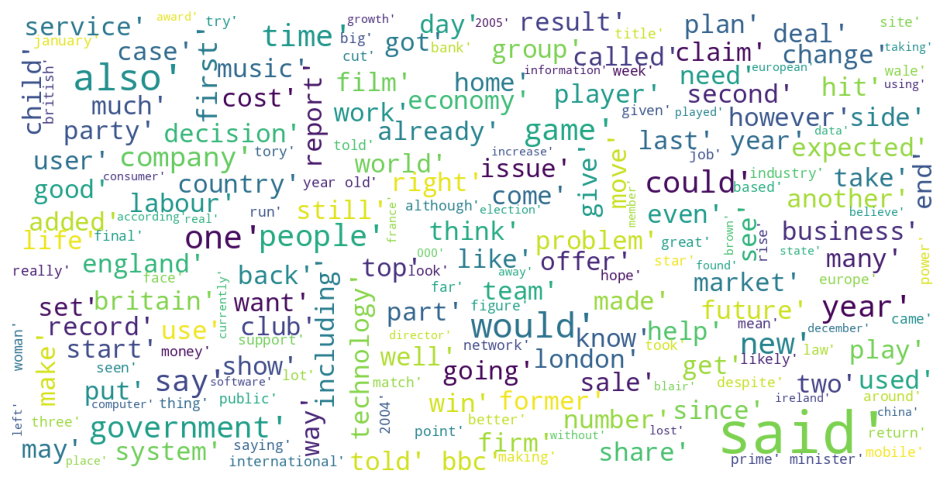

In [19]:
def plot_wordcloud(data):
    stop=set(stopwords.words('english'))
    def _preprocess_text(data):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in data:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus

    corpus=_preprocess_text(data)

    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=200,
        max_font_size=25,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
plot_wordcloud(bbc_text['News_Headline'])



In [20]:
bbc_text = bbc_text.apply(lambda x: x.astype(str).str.lower())


In [21]:
# Tokenization
bbc_text['text_clean'] = bbc_text['News_Headline'].apply(nltk.word_tokenize)
print('Step 1-Tokenization Done!.')
bbc_text.head()


Step 1-Tokenization Done!.


,category,News_Headline,text_clean
0,tech,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ..."


In [22]:

bbc_text['text_clean'] = bbc_text['text_clean'].apply(lambda x: ' '.join(x))


from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
                         stop_words='english', ngram_range=(1, 1))


tf_idf1 = tf_idf.fit_transform(bbc_text['text_clean'])

tf_idf1_array = tf_idf1.toarray()


tf_idf_df = pd.DataFrame(tf_idf1_array, columns=tf_idf.get_feature_names_out())

print(tf_idf_df.head())


        000   10       100   11   12   13   14        15        16   17  ...  \
0  0.029706  0.0  0.042394  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  ...   
1  0.059799  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  ...   
2  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.099563  0.000000  0.0  ...   
3  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  ...   
4  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.114984  0.0  ...   

   world  worth  written  wrong  year     years      york  young  yukos  \
0    0.0    0.0      0.0    0.0   0.0  0.051819  0.000000    0.0    0.0   
1    0.0    0.0      0.0    0.0   0.0  0.000000  0.000000    0.0    0.0   
2    0.0    0.0      0.0    0.0   0.0  0.000000  0.000000    0.0    0.0   
3    0.0    0.0      0.0    0.0   0.0  0.000000  0.000000    0.0    0.0   
4    0.0    0.0      0.0    0.0   0.0  0.000000  0.116343    0.0    0.0   

   zealand  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4  

In [23]:
bbc_text.category = bbc_text.category.map({'tech':0, 'business':1, 'sport':2, 'entertainment':3, 'politics':4})
bbc_text.category.unique()


array([0, 1, 2, 3, 4])

In [24]:
from sklearn.model_selection import train_test_split
X = bbc_text.text_clean
y = bbc_text.category
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 1)


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(stop_words = 'english',lowercase=False)

vector.fit(X_train)
vector.vocabulary_
X_transformed = vector.transform(X_train)
X_transformed.toarray()

X_test_transformed = vector.transform(X_test)


In [26]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_transformed, y_train)
# Fitting our Logistic Regression Model


LogisticRegression()

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_transformed, y_train)


RandomForestClassifier()

In [29]:
from sklearn.naive_bayes import MultinomialNB
naivebayes = MultinomialNB()
naivebayes.fit(X_transformed, y_train)


MultinomialNB()

In [30]:
# Importing SVM
from sklearn.svm import SVC, LinearSVC

svm = LinearSVC()
svm.fit(X_transformed, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [31]:
# Importing SVM
from sklearn.svm import SVC, LinearSVC

svm = LinearSVC()
svm.fit(X_transformed, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(rf.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(rf.predict(X_test_transformed), y_test))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       152
           1       0.99      0.95      0.97       218
           2       0.99      0.99      0.99       198
           3       0.96      0.99      0.98       154
           4       0.97      0.98      0.97       168

    accuracy                           0.98       890
   macro avg       0.97      0.98      0.98       890
weighted avg       0.98      0.98      0.98       890



[[149   0   0   2   1]
 [  4 207   1   2   4]
 [  1   0 196   1   0]
 [  1   0   0 153   0]
 [  0   3   0   1 164]]


In [49]:
headline2 = ['Elon Musk announces new Tesla electric truck model launch']

vec = vector.transform(headline2).toarray()


print('Headline:', headline2[0])


prediction = list(naivebayes.predict(vec))[0]
category = str(prediction).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3', 'ENTERTAINMENT').replace('4', 'POLITICS')

# Print the predicted category
print('Category:', category)

Headline: Elon Musk announces new Tesla electric truck model launch
Category: BUSINESS
